In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from itertools import product
import pandas as pd

# NSF Virus diagnostic kit design

### Calculating cost of a test
Cost is the cumulative monetary expense (price) and work value involved with a test.

The monetary requirement for a test involves:
- upfront expense (cost required to develop the test and deploy) which is a consideration added to the unit cost
- price per unit (the cost to make and deliver 1 test)

The work associated with a test involves:
- Steps involved from taking the sample to the actual result
- Portability (how well can this test be transported)
- Time needed to develop the test
- Time till result

### What do you mean "we don't have a budget"?
"Population" is an abstract value for the number of infected people your test could potentially reach or it can be interpreted as a budget. 

Either way, when taking into consideration the cost involved with a test, you are always left with the number of tests you can make which will be delivered to an infected person. 

For example, say the cost of our test is 4 units:
- £10,000 / 4 = 2,500 tests -> 1 test per person 


or


- 10,000 infected people / 4 = 2,500 people tested

Population is used as it is the final unit presented to participents.

In [53]:
population  = 10000

### What is the relationship between population and test cost?

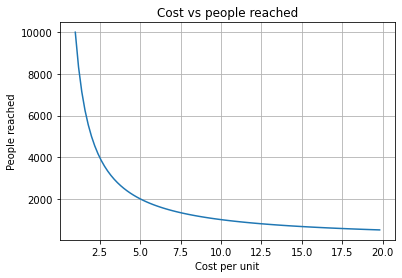

In [57]:
# Plotting cost - people reached relationship
costs_per_unit = np.arange(1, 20, 0.2)
num_units = population / costs_per_unit

fig, ax = plt.subplots()
ax.plot(costs_per_unit, num_units)
ax.set(xlabel='Cost per unit', ylabel='People reached',
       title='Cost vs people reached')
ax.grid()
plt.show()


### What distribution of costs should we aim for?

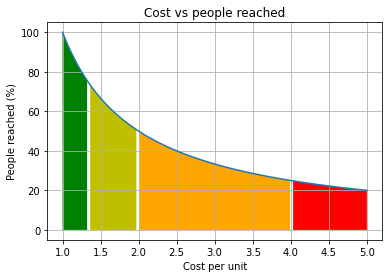

In [49]:
fig, ax = plt.subplots()

x = np.linspace(1, 5, 100)
y = ((population/x)/population) * 100 

ax.plot(x, y)
ax.set(xlabel='Cost per unit', ylabel='People reached (%)',
       title='Cost vs people reached')
ax.grid()
ax.fill_between(x, y,facecolor='g', where=(x >=1) & (x <= 1.33))
ax.fill_between(x, y,facecolor='y', where= (x >= 1.33) & (x <= 2))
ax.fill_between(x, y,facecolor='orange', where=(x >= 2) & (x <= 4))
ax.fill_between(x, y,facecolor='r', where= (x >= 4))
plt.show()

# green >75%
# yellow 75-50%
# orange 50-25%
# red <25%

### Breaking cost down into price and work

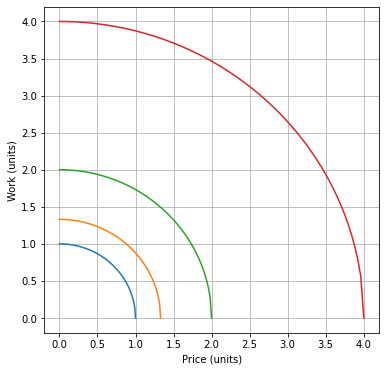

In [6]:
fig, ax = plt.subplots(figsize=(6,6))

def get_y_circle(r, x):
    return np.sqrt(np.square(r) - np.square(x))

for i in [1, 1.33, 2, 4]:
       x = np.linspace(0, i, 100)
       y = get_y_circle(i, x)
       ax.plot(x, y)

ax.set(xlabel='Price (units)', ylabel='Work (units)', title='')
ax.grid()
plt.show()

### How to calculate cost

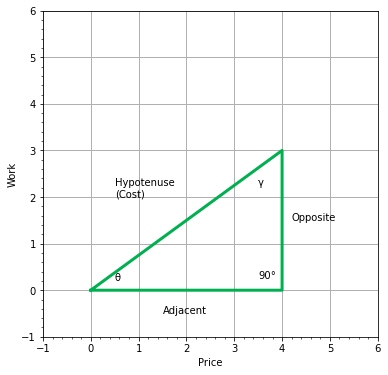

In [7]:
x = np.array([0,4,4,0])
y = np.array([0,0,3,0])
# Figure and Axes
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x,y,color=[0/255,176/255,80/255], linewidth=3)

plt.xlim([-1,6])
plt.ylim([-1,6])

ax.grid(axis='both',which='major', linestyle='-', linewidth=1)
ax.minorticks_on()

ax.text(0.5,0.2,'θ')
ax.text(3.5,0.25,'90°')
ax.text(3.5,2.25,'γ')
ax.text(1.5,-0.5,'Adjacent')
ax.text(4.2,1.5,'Opposite')
ax.text(0.5,2,'Hypotenuse\n(Cost)')
ax.set(xlabel="Price", ylabel="Work")

plt.show()

$Hypotenuse = \sqrt{adjacent^2 + opposite^2}$ 

or 

$Cost = \sqrt{price^2 + work^2}$

### Defining our tests
Base test is used as a template, a mid-range test, for which the real tests are derived from. Enabling us to make certain aspects better or worse depending on our needs.

In [8]:
class BaseTest:
    # Price
    upfront_expense     = 0.5
    price_per_unit      = 1

    # Work
    steps               = 0.25
    portability         = 0.25
    dev_time            = 0.25
    result_time         = 0.25

    @classmethod
    def price(cls):
        return cls.upfront_expense + cls.price_per_unit

    @classmethod
    def work(cls):
        return cls.steps + cls.portability + cls.dev_time + cls.result_time

    @classmethod
    def cost(cls):
        return np.hypot(cls.price(), cls.work())


class LFT(BaseTest):
    price_per_unit      = 0.3

    steps               = 0.1
    portability         = 0.1
    dev_time            = 0.7
    result_time         = 0.1


class PCR(BaseTest):
    upfront_expense     = 0.8
    price_per_unit      = 0.5

    portability         = .6
    dev_time            = 0.2
    result_time         = 0.3
    steps               = 0.4


class Antibody(BaseTest):
    upfront_expense     = 0.9
    price_per_unit      = 0.9

    steps               = 0.7
    portability         = 1
    result_time         = 0.4



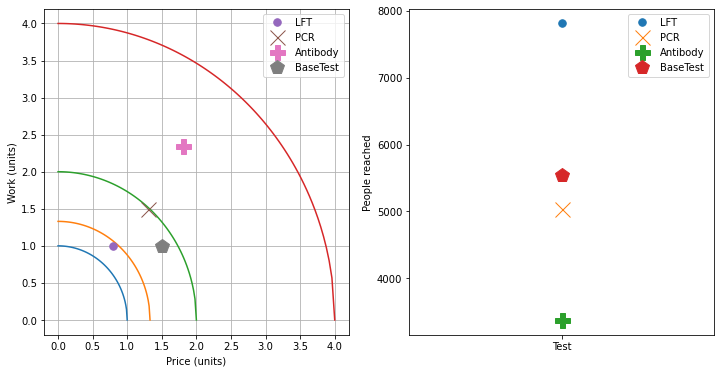

In [56]:
fig, ax = plt.subplots(ncols=2,figsize=(12,6))

for i in [1, 1.33, 2, 4]: # draw circles
       x = np.linspace(0, i, 100)
       y = get_y_circle(i, x)
       ax[0].plot(x, y)


for t, m in zip([LFT, PCR, Antibody, BaseTest], ['.', 'x', 'P', 'p']): # plot tests
       x = t.price()
       y = t.work()
       ax[0].plot(x, y, marker=m, markersize=15, label=t.__name__, linestyle='None')
       x = "Test"
       y = population/t.cost()
       ax[1].plot(x,y, marker=m, markersize=15, label=t.__name__, linestyle='None')


ax[0].set(xlabel='Price (units)', ylabel='Work (units)', title='')
ax[1].set(ylabel='People reached', title='')
ax[0].grid()
ax[0].legend()
ax[1].legend()
plt.show()
# print(LFT.cost(), PCR.cost(), Antibody.cost())

In [46]:
cut_off = { # fraction of people who will be correctly testet tested, adjusted for penalty from including people who don't have disease
    "low"       : .65,
    "medium"    : .95,
    "high"      : .35
    }

stage_of_disease = { # fraction of people who need to be retested
    "All"                   : 0.15,
    "Early onset"           : 0.35,
    "Very symptomatic"      : 0.05
    }

Outcome is the number of people whose life has been improved thanks to your test.

$Outcome = \dfrac{population}{cost} \times \dfrac{cut\_off}{1 + stage\_of\_disease}$

In [26]:
def calc_outcome(cost, cutoff, stag_dis):
    f1 = population / cost
    f2 = cutoff / (1+stag_dis)
    return f1 * f2

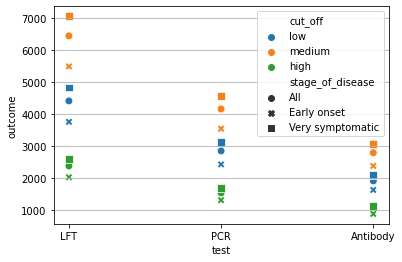

In [48]:
data = {
    "test" : [],
    "cut_off" : [],
    "stage_of_disease" : [],
    "outcome" : []
    }

for t in [LFT, PCR, Antibody]:

    cost = t.cost()

    for co, sd in product(cut_off, stage_of_disease):
        cov = cut_off[co]
        sdv = stage_of_disease[sd]

        v = calc_outcome(cost, cov, sdv)
        # v = (population/cost) * (cov / (1+sdv))

        data['test'].append(t.__name__)
        data['cut_off'].append(co)
        data['stage_of_disease'].append(sd)
        data['outcome'].append(v)

df = pd.DataFrame(data)
sns.scatterplot(data=df, x='test', y='outcome', hue='cut_off', style='stage_of_disease', s=60)
plt.grid(axis='y')


In [58]:
3**3

27

Tests:
1. viral DNA test / swab test
2. Blood test
3. LFT / spit test

Interaction:
QR code / barcode \w scanner